### Figure

- matplotlib에서 모든 그래프 구성 요소를 담고 있는 최상위 객체
- .scatter()함수로 산점도를 그리려 하면, 자동으로도 figure 객체가 생성된다
- figure() 함수로 명시적으로 figure 객체를 만들어 활용 가능 -> 다양한 그래프 옵션 조절 가능


In [1]:
import gdown

gdown.download('https://bit.ly/3pK7iuu', 'ns_book7.csv', quiet=False)

Downloading...
From: https://bit.ly/3pK7iuu
To: /content/ns_book7.csv
100%|██████████| 53.8M/53.8M [00:00<00:00, 93.8MB/s]


'ns_book7.csv'

In [2]:
import pandas as pd

ns_book7 = pd.read_csv('ns_book7.csv', low_memory=False)
ns_book7.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


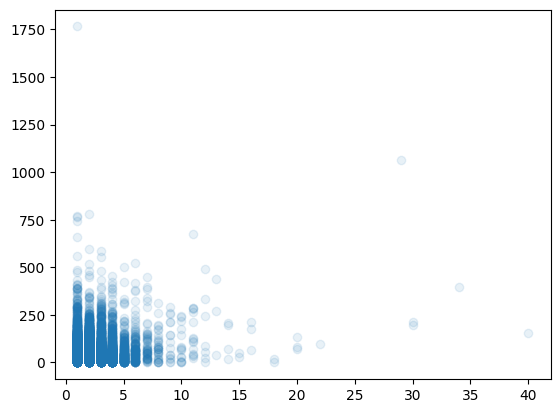

In [3]:
import matplotlib.pyplot as plt

plt.scatter(ns_book7['도서권수'], ns_book7['대출건수'], alpha=0.1)
plt.show()

In [4]:
# 그래프 크기 바꾸기 : figsize 매개변수
# 현재 figure의 크기 확인
print(plt.rcParams['figure.figsize'])

[6.4, 4.8]


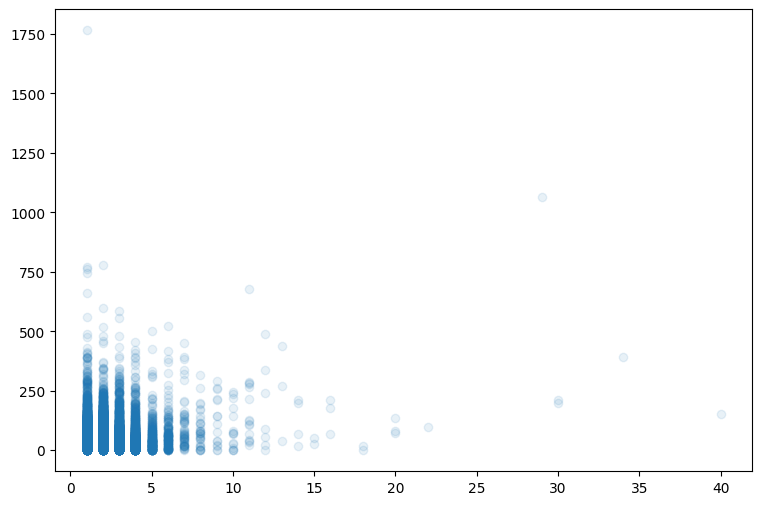

In [5]:
plt.figure(figsize = (9,6))
plt.scatter(ns_book7['도서권수'], ns_book7['대출건수'], alpha = 0.1)
plt.show()

왜 가로 길이를 9인치로 설정했는데, 이보다 더 작은 사이즈로 결과값이 나오는 거지?

> figsize 매개변수에 지정한 대로 그래프가 그려지지 않은 이유 : DPI
- 보통 컴퓨터 화면의 해상도를 말할 때, 픽셀 수와 dpi를 사용
- dpi 는 dot per inch의 약자로 1인치를 몇개의 점(픽셀)으로 표현하는지 나타낸다
- 따라서, dpi에 따라 화면에 그려지는 그래프의 크기가 달라진다.
- **맷플롯립의 dpi는 100인데, 컴퓨터의 dpi는 200이면, 맷플롯립에서는 9인치를 그릴 때, 900개의 픽셀을 사용했는데, 해당 파일이 컴퓨터로 가면, 픽셀 수는 같은데, dpi가 늘어나기에, 그림 크기가 작게 보이는 것이다.**

In [6]:
print(plt.rcParams['figure.dpi'])

100.0


- 인치값은 먼저 원하는 픽셀 값을 정한 다음 픽셀 값을 dpi로 나누어주면 구할 수 있다.
- ex) 900 x 600 픽셀의 그래프를 그리고 싶다 -> 맷플롯립의 dpi는 100이기에, figsize = (900 / 100, 600 / 100)으로 입력

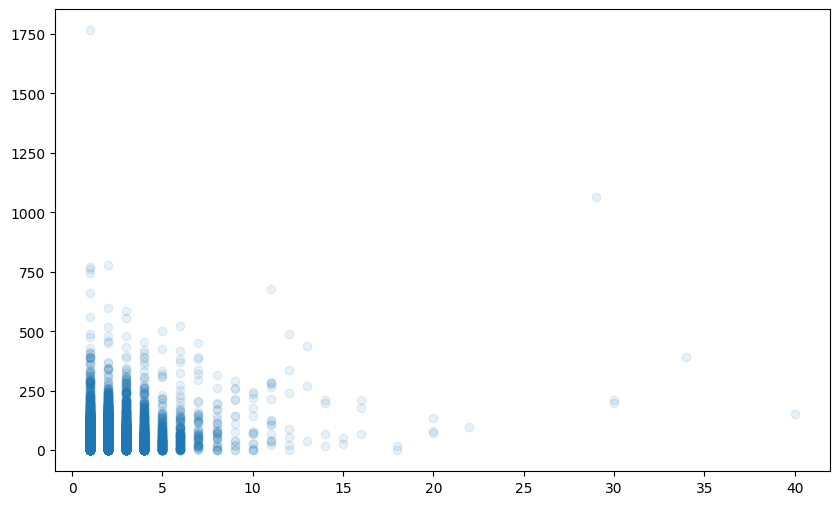

In [14]:
%config InlineBackend.print_figure_kwargs = {'bbox_inches': 'tight'}
plt.figure(figsize=(1000/100, 600/100))
plt.scatter(ns_book7['도서권수'], ns_book7['대출건수'], alpha=0.1)
plt.show()

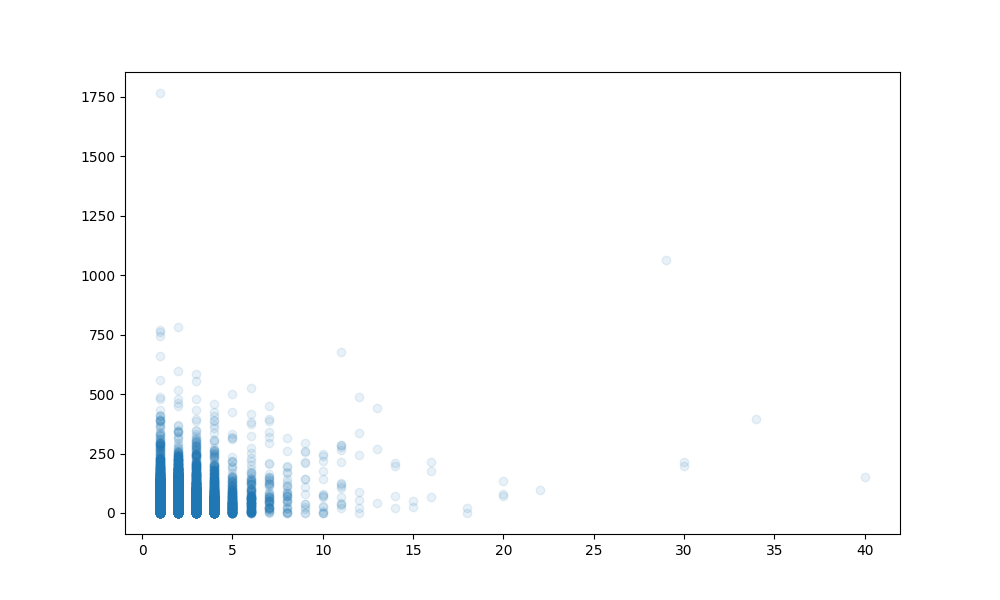

In [13]:
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}
plt.figure(figsize=(1000/100, 600/100))
plt.scatter(ns_book7['도서권수'], ns_book7['대출건수'], alpha=0.1)
plt.show()

> 그래프 크기 바꾸기 : dpi 매개변수

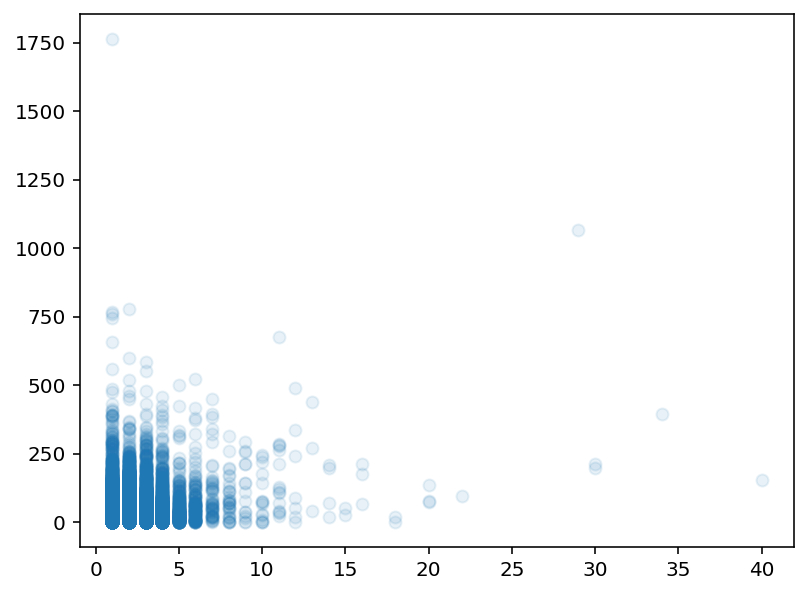

In [15]:
# figure가 아닌 dpi를 늘려주면 그래프 안의 모든 요소들의 크기가 커진다.
plt.figure(dpi = 144)
plt.scatter(ns_book7['도서권수'], ns_book7['대출건수'], alpha=0.1)
plt.show()

> figsize는 그래프를 그리는 도화지의 크기, dpi는 그래프를 확대해서 보는 돋보기

## rcParams 객체

- 맷플롯립 그래프의 기본값을 관리하는 객체
- 기본값을 출력해주는 것뿐만 아니라, 새로운 값으로 바꿔줄 수도 있음 => 변경 이후, 그려지는 모든 그래프에 바뀐 설정이 적용됨

In [17]:
plt.rcParams['figure.dpi'] = 100

In [18]:
plt.rcParams['scatter.marker'] = '*'

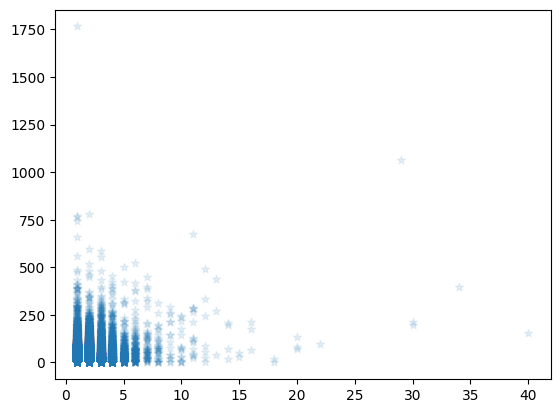

In [19]:
plt.scatter(ns_book7['도서권수'], ns_book7['대출건수'], alpha=0.1)
plt.show()

- 기본값을 변경하지 않아도, scatter() 함수 내부에서 marker 매개변수로 마커의 모양을 지정 가능

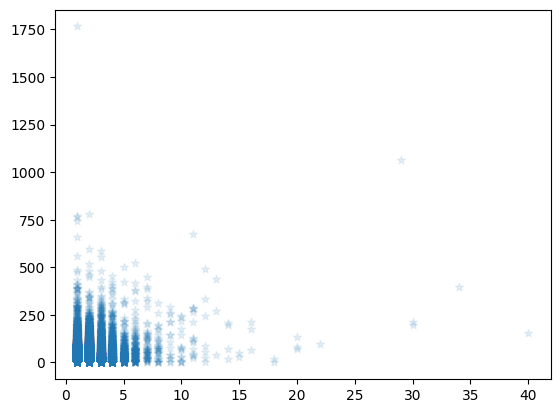

In [20]:
plt.scatter(ns_book7['도서권수'], ns_book7['대출건수'], alpha = 0.1, marker = '*')
plt.show()

### 여러 개의 서브플롯 출력하기

- subplot : 맷플롯립의 Axes 클래스의 객체
- 보통 2개 이상의 축을 포함
- 각 축에는 눈금 or 틱이 표시됨
- 축의 이름을 나타내는 label 레이블이 있음

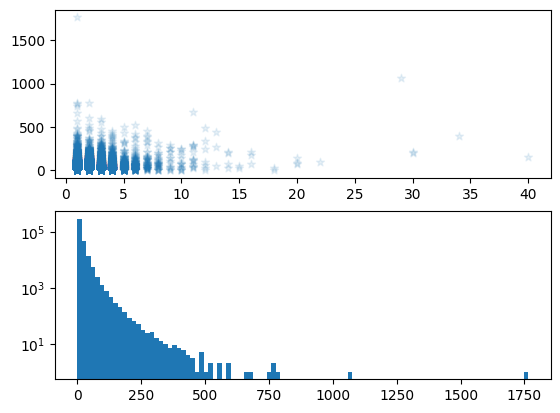

In [21]:
# subplot은 figure 객체와 각 서브플롯을 나타내는 Axes 객체의 배열을 반환
fig, axs = plt.subplots(2)
axs[0].scatter(ns_book7['도서권수'], ns_book7['대출건수'], alpha=0.1)
axs[1].hist(ns_book7['대출건수'], bins=100)
axs[1].set_yscale('log')
fig.show()

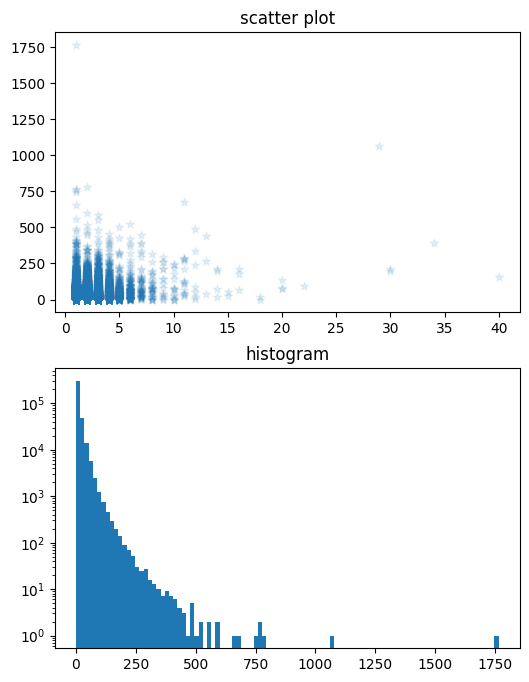

In [22]:
fig, axs = plt.subplots(2, figsize = (6,8))
axs[0].scatter(ns_book7['도서권수'], ns_book7['대출건수'], alpha = 0.1)
axs[0].set_title('scatter plot')

axs[1].hist(ns_book7['대출건수'], bins=100)
axs[1].set_title('histogram')
axs[1].set_yscale('log')

fig.show()

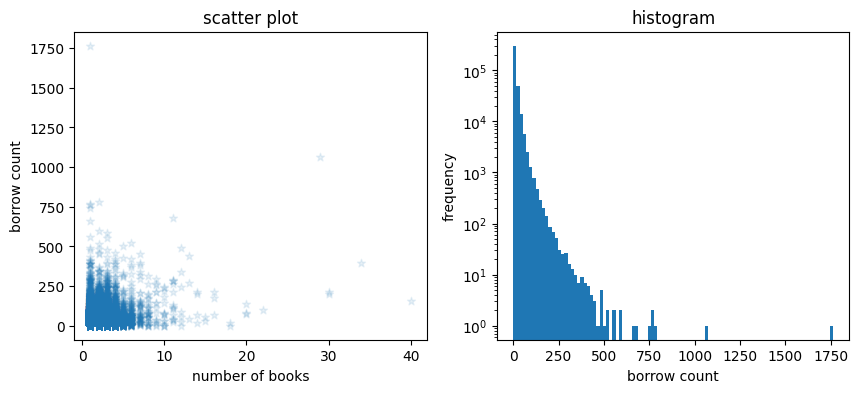

In [23]:
# subplot을 가로로 출력하기
fig, axs = plt.subplots(1,2, figsize = (10,4))

axs[0].scatter(ns_book7['도서권수'], ns_book7['대출건수'], alpha=0.1)
axs[0].set_title('scatter plot')
axs[0].set_xlabel('number of books')
axs[0].set_ylabel('borrow count')

axs[1].hist(ns_book7['대출건수'], bins=100)
axs[1].set_title('histogram')
axs[1].set_yscale('log')
axs[1].set_xlabel('borrow count')
axs[1].set_ylabel('frequency')

fig.show()